# LIONS Analysis

Our project is to analyze federal cases.

In [33]:
from lions.parse import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
_, cases = gs_case(columns=['ID', 'DISTRICT', 'CLASS', 'LEAD_CHARGE'])
_, hist = gs_court_hist(columns=['ID','CASEID', 'DISTRICT', 'COURT', 'APPEAL_TYPE', 'SENT_APPEAL', \
                                 'DISPOSITION', 'DISP_REASON1', 'DISP_REASON2', 'DISP_REASON3'])
_, court_judge = gs_court_judge(columns=['ID','CASEID', 'DISTRICT', 'CRTHISID', 'JUDGEID', 'DECISION'])
_, judge = gs_judge(columns=['DISTRICT', 'ID', 'LAST_NAME', 'FIRST_NAME'])

In [21]:
cases_df = pd.DataFrame(cases, columns = cases[0].keys())
cases_df_cols = list(cases_df.columns)
cases_df_cols[0] = 'CASEID'
cases_df.columns = cases_df_cols
#del cases

hist_df = pd.DataFrame(hist, columns = hist[0].keys())
hist_df_cols = list(hist_df.columns)
hist_df_cols[0] = 'CRTHISID'
hist_df.columns = hist_df_cols
#del hist

court_judge_df = pd.DataFrame(court_judge, columns = court_judge[0].keys())
#del court_judge

judge_df = pd.DataFrame(judge, columns = judge[0].keys())
judge_df_cols = list(judge_df.columns)
judge_df_cols[1] = 'JUDGEID'
judge_df.columns = judge_df_cols
#del judge

print(len(cases_df))
print(len(hist_df))

6041748
8262351


In [22]:
cases_df_copy = cases_df.copy()
cases_df = cases_df.sample(2000000)

In [23]:
cases_hist_df = pd.merge(cases_df, 
                         hist_df, 
                         left_on = ['CASEID','DISTRICT'], 
                         right_on = ['CASEID','DISTRICT'], 
                         how = 'inner')
#del cases_df
#del hist_df
print("Done merging Cases DF and Hist DF")
print(len(cases_hist_df))

cases_hist_court_df = pd.merge(cases_hist_df, 
                               court_judge_df, 
                               left_on = ['CASEID','DISTRICT', 'CRTHISID'], 
                               right_on = ['CASEID','DISTRICT', 'CRTHISID'], 
                               how = 'inner')
#del cases_hist_df
#del court_judge_df
print("Done merging Cases Hist DF and Court Judge DF")
print(len(cases_hist_court_df))

cases_hist_court_judge_df = pd.merge(cases_hist_court_df, 
                                     judge_df, 
                                     left_on = ['JUDGEID','DISTRICT'], 
                                     right_on = ['JUDGEID','DISTRICT'], 
                                     how = 'inner')
#del cases_hist_court_df
#del judge_df
print("Done merging Cases Hist Court DF and Judge DF")
print(len(cases_hist_court_judge_df))


withdisp_df = cases_hist_court_judge_df[cases_hist_court_judge_df.DISPOSITION != '']
#del cases_hist_court_judge_df

withdisp_reason_df = withdisp_df[withdisp_df.DISP_REASON1 != '']
withoutdisp_reason_df = withdisp_df[withdisp_df.DISP_REASON1 == '']

Done merging Cases DF and Hist DF
2734068
Done merging Cases Hist DF and Court Judge DF
1657931
Done merging Cases Hist Court DF and Judge DF
1657393


In [24]:
columns_to_drop = ['ID','CASEID', 'CRTHISID','DISP_REASON1', 'DISP_REASON2',
                   'DISP_REASON3', 'JUDGEID', 'DECISION', 'LAST_NAME', 'FIRST_NAME']

disp_reasons = ['VACA','VARM','RDAP','RDRR','REVA','REVR','OFPO','GWDA','DEPO','LECI','WKEV','WTPR']


misconduct = []
disp1 = withdisp_reason_df['DISP_REASON1'].tolist()

for i in range(len(disp1)):
    if disp1[i] in disp_reasons: 
        misconduct.append(1)
    else:
        misconduct.append(0)


df_classify = withdisp_reason_df.drop(columns_to_drop, axis = 1)
df_to_classify = withoutdisp_reason_df.drop(columns_to_drop, axis=1)

df_classify.columns

Index(['DISTRICT', 'CLASS', 'LEAD_CHARGE', 'COURT', 'APPEAL_TYPE',
       'SENT_APPEAL', 'DISPOSITION'],
      dtype='object')

In [25]:
df_district = pd.get_dummies(df_classify['DISTRICT'], prefix = 'District')
df_charge = pd.get_dummies(df_classify['LEAD_CHARGE'], prefix = 'Charge')
df_class = pd.get_dummies(df_classify['CLASS'], prefix = 'Class')
df_court = pd.get_dummies(df_classify['COURT'], prefix = 'Court')
df_appeal = pd.get_dummies(df_classify['APPEAL_TYPE'], prefix = 'Appeal')
df_sent = pd.get_dummies(df_classify['SENT_APPEAL'], prefix = 'Sent')
df_disposition = pd.get_dummies(df_classify['DISPOSITION'], prefix = 'Disposition')

df_new = pd.concat([df_classify, df_district, df_charge, df_class, df_court, df_appeal, df_sent, df_disposition], axis=1)
del df_classify
del df_district
del df_charge
del df_class 
del df_court
del df_appeal
del df_sent
del df_disposition

df_new = df_new.drop(['DISTRICT','CLASS','LEAD_CHARGE', 'COURT', 'APPEAL_TYPE','SENT_APPEAL','DISPOSITION'], axis=1)
print("First step done")


df_district = pd.get_dummies(df_to_classify['DISTRICT'], prefix = 'District')
df_charge = pd.get_dummies(df_to_classify['LEAD_CHARGE'], prefix = 'Charge')
df_class = pd.get_dummies(df_to_classify['CLASS'], prefix = 'Class')
df_court = pd.get_dummies(df_to_classify['COURT'], prefix = 'Court')
df_appeal = pd.get_dummies(df_to_classify['APPEAL_TYPE'], prefix = 'Appeal')
df_sent = pd.get_dummies(df_to_classify['SENT_APPEAL'], prefix = 'Sent')
df_disposition = pd.get_dummies(df_to_classify['DISPOSITION'], prefix = 'Disposition')

df_new_to_classify = pd.concat([df_to_classify, df_district, df_charge, df_class, df_court, df_appeal, df_sent, df_disposition], axis=1)
df_new_to_classify = df_new_to_classify.drop(['DISTRICT','CLASS','LEAD_CHARGE', 'COURT', 'APPEAL_TYPE','SENT_APPEAL','DISPOSITION'], axis=1)
print("Second step done")

del df_to_classify
del df_district
del df_charge
del df_class 
del df_court
del df_appeal
del df_sent
del df_disposition

common_cols = list(set(df_new).intersection(df_new_to_classify))

df_new = df_new[common_cols]
df_new_to_classify = df_new_to_classify[common_cols]
df_new

First step done
Second step done


,Charge_08 :01326(a),Charge_08 :01326ab2,Charge_18 :00510(C),Charge_16 :00703,Charge_08 :01362,Charge_18 :01029,Charge_18 :01111,Disposition_DS,Disposition_DA,Charge_07 :02024(b),...,Charge_18 :00201,Charge_18 :02314,Charge_18 :02252a,District_ILC,Charge_21 :00841a1,District_TXS,Charge_42 :06928d2,Charge_18 :01701,Court_MM,District_DC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#generate our train and test dataset
m = int(df_new.shape[0]*0.1)

df_to_be_classified = df_new_to_classify

df_train = df_new.sample(m)
df_test = df_new.drop(df_train.index)
list_train = misconduct[:m]
list_test = misconduct[m:]

df_train

,Charge_08 :01326(a),Charge_08 :01326ab2,Charge_18 :00510(C),Charge_16 :00703,Charge_08 :01362,Charge_18 :01029,Charge_18 :01111,Disposition_DS,Disposition_DA,Charge_07 :02024(b),...,Charge_18 :00201,Charge_18 :02314,Charge_18 :02252a,District_ILC,Charge_21 :00841a1,District_TXS,Charge_42 :06928d2,Charge_18 :01701,Court_MM,District_DC
724648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1080208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
899747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# from sklearn.neighbors import KNeighborsClassifier
# import sklearn.model_selection as cross_validation

# #build our knn model and print the accuracy score
# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(df_train, list_train)

# #print the accuracy score
# print('KNeighbor accuracy on test data: ', knn.score(df_test, list_test))
# print('KNeighbor accuracy on training data: ', knn.score(df_train, list_train))

# #accuracy score from crossvalidation
# scores = cross_validation.cross_val_score(knn, df_new, misconduct, cv=5)
# print("KNN Accuracy from crossvalidation:: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNeighbor accuracy on test data:  0.958860892256316
KNeighbor accuracy on training data:  0.968
KNN Accuracy from crossvalidation:: 0.96 (+/- 0.01)


In [27]:
from sklearn import tree
import sklearn.model_selection as cross_validation

#build our decision trees model
dtc = tree.DecisionTreeClassifier()
dtc.fit(df_train, list_train)

#print the accuracy score
print('DT accuracy on test data: ', dtc.score(df_test, list_test))
print('DT accuracy on training data: ', dtc.score(df_train, list_train))

#accuracy score from crossvalidation
scores = cross_validation.cross_val_score(dtc, df_new, misconduct, cv=5)
print("DT Accuracy from crossvalidation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

DT accuracy on test data:  0.996596466949358
DT accuracy on training data:  0.9996717675759592
DT Accuracy from crossvalidation: 0.99 (+/- 0.01)


In [29]:
from sklearn.linear_model import LogisticRegression

#build our logistic regression model
lgr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lgr.fit(df_train, list_train)

#print the accuracy score
print("Accuracy of logistic regression test set:", lgr.score(df_test, list_test))
print("Accuracy of logistic regression train set:", lgr.score(df_train, list_train))

#accuracy score from crossvalidation
#scores = cross_validation.cross_val_score(lgr, df_new, misconduct, cv=5)
#print("Logistic Regression Accuracy from crossvalidation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of logistic regression test set: 0.9966112520625233
Accuracy of logistic regression train set: 0.999645154136172


In [68]:
df_prediction_knn = lgr.predict(df_to_be_classified)

df_results = withoutdisp_reason_df.copy()
df_results['misconduct'] = df_prediction_knn
df_misconduct1 = df_results[df_results['misconduct'] == 1]
df_no_misconduct1 = df_results[df_results['misconduct'] == 0]

df_result = withdisp_reason_df.copy()
df_result['misconduct'] = misconduct
df_misconduct2 = df_result[df_result['misconduct'] == 1]
df_no_misconduct2 = df_result[df_result['misconduct'] == 0]

df_misconduct = pd.concat([df_misconduct1,df_misconduct2],axis=0)
df_no_misconduct = pd.concat([df_no_misconduct1,df_no_misconduct2],axis=0)
df_misconduct['JUDGE_NAME'] = df_misconduct['FIRST_NAME'] + df_misconduct['LAST_NAME']

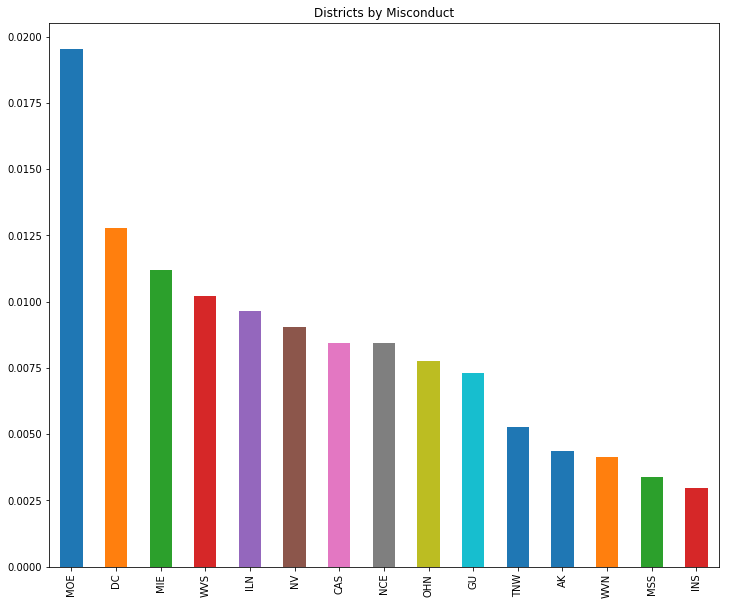

In [79]:
'''
df_misconduct = pd.concat([df_misconduct1,df_misconduct2],axis=0)
districts_bad = df_misconduct['DISTRICT'].value_counts()
districts_total = df_results['DISTRICT'].value_counts()

districts = districts_bad / districts_total
districts.sort_values(inplace=True, ascending=False)
districts.fillna(value=0, inplace=True)

plt.figure(figsize=(15,10))
districts.plot.bar()
plt.title("Label Frequency", fontsize=15)
plt.show()

print(districts.head(n=10))
print(districts.tail(n=10))
'''
district_misconduct = df_misconduct['DISTRICT'].value_counts()
district_no_misconduct = df_no_misconduct['DISTRICT'].value_counts()
percentage = []
for i in district_misconduct.keys():
    temp = float(district_misconduct[i]/(district_no_misconduct[i] + district_misconduct[i]))
    percentage.append([temp,i])
percentage = sorted(percentage)[::-1]

X = [dist[1] for dist in percentage]
Y = [dist[0] for dist in percentage]
districts = pd.Series(data=Y, index=X)
plt.figure(figsize=(12,10))
plt.title("Districts by Misconduct")
districts.head(n=15).plot.bar()
plt.savefig("Plot.png")
plt.show()

In [89]:
global_lions = parse_global_LIONS()

In [96]:
_, charge_type = global_lions['GS_CHARGE_TYPE']
charges = {}
for c in charge_type:
    charges[c['CODE']] = c['DESCRIPTION']

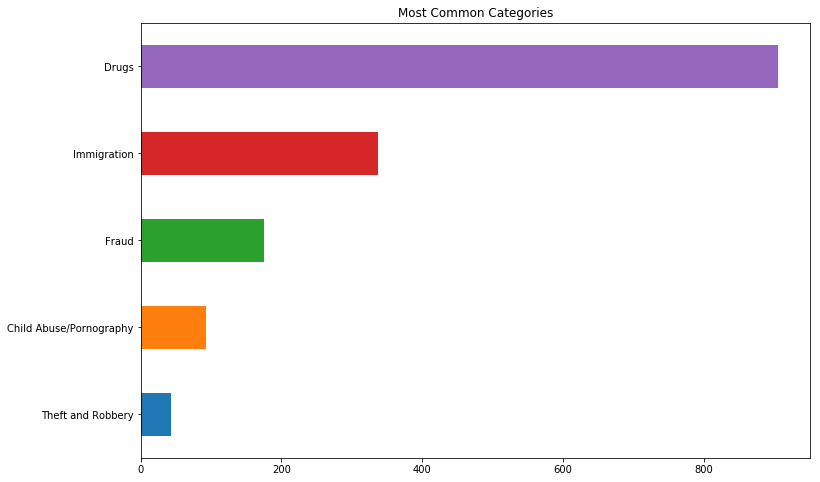

In [119]:
counts = df_misconduct['LEAD_CHARGE'].value_counts()
new_keys = []
for key in counts.keys():
    if key not in charges:
        new_keys += [key]
    else:
        new_keys += [charges[key]]
    
#print(new_keys)
counts.index = new_keys
del counts['']
del counts['*']
counts

drugs = counts['Manufacture, distribute, dispense, possess a controlled substance'] + \
        counts['Drug Abuse Prevention & Control-Prohibited acts A'] + \
        counts['Unlawful shipment, transfer, receipt, or possession by a felon'] + \
        counts['Importation of controlled substances']

immig = counts['Reentry of removed aliens - In general'] + \
        counts['Reentry of deported alien'] + \
        counts['Entry of alien at improper time or place; etc.'] + \
        counts['Bringing in/harboring certain aliens for commerc adv/private finc gain']

fraud = counts['Mail Fraud - Frauds and swindles'] + \
        counts['Bank Fraud'] + \
        counts['Fraud by wire, radio, or television'] + \
        counts['Conspiracy to commit offense or to defraud US'] + \
        counts['Fraud/false statements or entries generally'] + \
        counts['Fraud and related activity - id documents']

child_abuse = counts['Material involving sexual exploitation of minors'] + \
              counts['Activity relating material constituting/containing child pornography']

theft = counts['Bank robbery and incidental crimes'] + \
        counts['Hobbs Act']

indices = ['Drugs', 'Immigration', 'Fraud', 'Child Abuse/Pornography', 'Theft and Robbery']
values  = [drugs, immig, fraud, child_abuse, theft]

categories = pd.Series(data=values, index=indices)
categories.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(12,8))
plt.title("Most Common Categories")
categories.plot.barh()
plt.savefig("Categories.png")
plt.show()